## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
output = pd.merge(mouse_metadata,study_results,
                 on='Mouse ID',
                 how='outer')
# Display the data table for preview
output

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = output['Mouse ID'].count()
mice_number = pd.DataFrame({"Number of Mice": [number_mice]}, index=[0])
mice_number



,Number of Mice
0,1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
#output[df.duplicated()]

dup_rows = output[output.duplicated(['Mouse ID', 'Timepoint'])]
dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = output[output.duplicated(['Mouse ID'])]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
#apply drop duplicates to get clean data, use drop duplicates for a clean data
dropping_duplicates = output.drop_duplicates('Mouse ID')
dropping_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = dropping_duplicates['Mouse ID'].count()
clean_data = pd.DataFrame({"Number of Mice": [clean_data]}, index=[0])
clean_data

,Number of Mice
0,249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_reg = pd.DataFrame(output.groupby("Drug Regimen").count())
summary_reg ["Mean"] = pd.DataFrame(output.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_reg ["Median"] = pd.DataFrame(output.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_reg ["Variance"] = pd.DataFrame(output.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_reg ["Standard Deviation"] = pd.DataFrame(output.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_reg ["SEM"] = pd.DataFrame(output.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary dataframe.
summary_reg = summary_reg[["Mean","Median","Variance","Standard Deviation","SEM"]]
summary_reg.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#summary_reg = summary_reg[["Mean","Median","Variance","Standard Deviation","SEM"]]
regg_regi = output.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regg_regi

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = output.groupby("Drug Regimen").agg({"Timepoint":'count'})


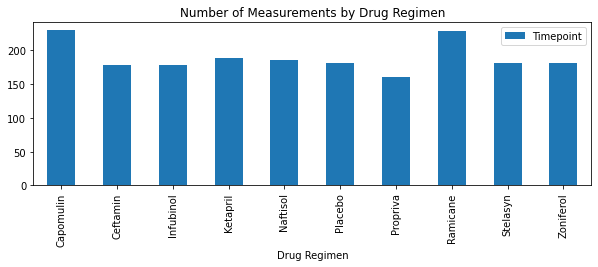

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements.plot(kind="bar", figsize=(10,3))

plt.title("Number of Measurements by Drug Regimen")
plt.show()
plt.tight_layout()


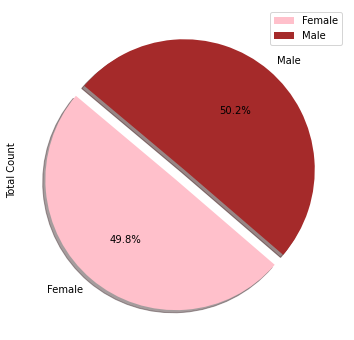

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution = output.groupby(["Mouse ID","Sex"])

#group them by size
gender_distribution = pd.DataFrame(gender_distribution.size())

#begin breaking down the dataframe/rename by female and male counts
gender_summary = pd.DataFrame(gender_distribution.groupby(["Sex"]).count())
gender_summary.columns = ["Total Count"]

#create the percentage by dividing for the pie plot
gender_summary["Distribution of Mice by Gender"] = (100*(gender_summary["Total Count"]/gender_summary["Total Count"].sum()))

#plot the pie chart
explode = (0.1,0)
colors = ['pink','brown']
plot = gender_summary.plot.pie(y='Total Count',
                                 figsize=(6,6),
                                 colors=colors, 
                                 startangle=140, 
                                 explode = explode,
                                 shadow = True,
                                 autopct="%1.1f%%")


(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

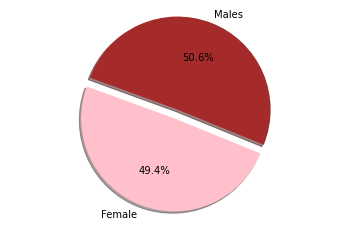

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = (output.groupby(["Sex"])["Mouse ID"].count())

labels = ["Female","Males"]
colors = ["Pink","brown"]
explode = (0.1,0)

plt.pie(sex_distribution, 
        explode=explode, 
        labels=labels,
        colors=colors, 
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=160)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = output[output["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = treatment_regimens.sort_values(["Timepoint"],ascending = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_summary = treatment_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_summary

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

SyntaxError: invalid syntax (<ipython-input-15-9039567eafdd>, line 2)

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of mice on Capomulin')

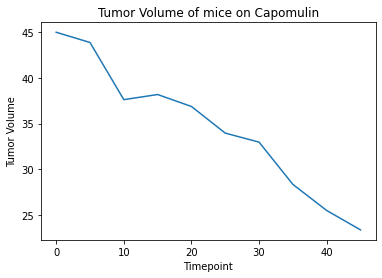

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_cap = output.loc[(output["Drug Regimen"] == "Capomulin"),:]
line_cap = line_cap.reset_index()

#select only one mouse
one_mouse = line_cap .loc[line_cap["Mouse ID"] == "s185"]

time_point = one_mouse["Timepoint"]
tumor_line = one_mouse["Tumor Volume (mm3)"]

tumor_line = plt.plot(time_point,tumor_line)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume of mice on Capomulin')


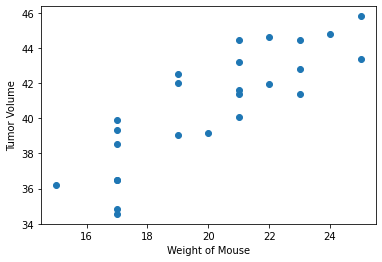

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Pull values for x and y values
mice_weight = line_cap.groupby(line_cap["Mouse ID"])["Weight (g)"].mean()
tumor_vol = line_cap.groupby(line_cap["Mouse ID"])["Tumor Volume (mm3)"].mean()

#plot the values 
plt.scatter(mice_weight, tumor_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

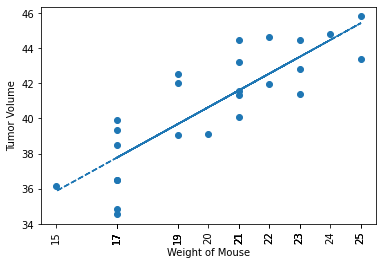

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = line_cap.groupby(line_cap["Mouse ID"])["Weight (g)"].mean()
tumor_vol = line_cap.groupby(line_cap["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p, std_err = st.linregress(mice_weight,tumor_vol)

fit = slope * mice_weight + int

#plot the linear regression model
plt.scatter(mice_weight,tumor_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mice_weight,fit,"--")
plt.xticks(mice_weight, rotation=90)
plt.show()